## 📊 Bank Marketing Campaign Analysis
*Exploratory Data Analysis Template*
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

Date: 2025-07-09

Author: Angela Cucunuba
### Introduction

This notebook performs an Exploratory Data Analysis (EDA) on a marketing dataset from a bank.

Our goal is to understand which features influence whether a customer subscribes to a term deposit (`y` column).

#### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.proportion import proportions_ztest

import numpy as np


In [2]:
# Load Data
df = pd.read_csv("data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [77]:
# Basic Checks
print("\nGeneral Infomation:")
df.info()


General Infomation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Understand the columns:
Features:
- age: age in years, Some ages may be more interested
- job: type of job, Some jobs may be more interested
- marital: marital status, Could influence financial behavior ?
- education: education levels, May relate to financial literacy. 
- default: has credit in default? Riskier clients?
- balance: average yearly balance, in euros, Some balance may be more interested
- housing: has housing loan?, Financial commitments
- loan: has personal loan?, Financial commitments
- contact: contact communication type, Maybe some channels convert better
- day: last contact day of the month 
- month: last contact month of year.
- duration: last contact duration, in seconds, longer calls = more yes (?)
- campaign: number of contacts performed during this campaign and for this client, Push too much = fatigue (?)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client.
- poutcome: outcome of the previous marketing campaign.


In [4]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

print("\nDuplicated values:")
print(df.duplicated().sum())

# Preview target variable
print("\nPreview target:")
print(df['y'].value_counts(normalize=True))


Missing values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Duplicated values:
0

Preview target:
y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


In [93]:
# New Features
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18–30', '31–40', '41–50', '51–60', '60+'])

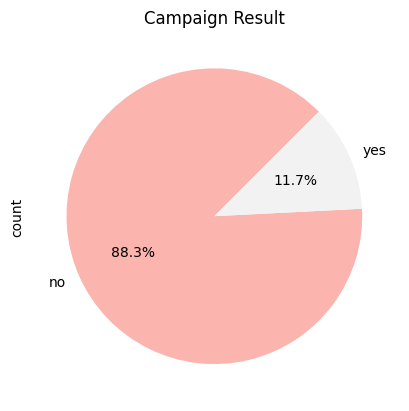

In [79]:
# Charts
df['y'].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=45, cmap="Pastel1")
plt.title("Campaign Result")
plt.show()

In [7]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Text(0, 0.5, 'Percentage of customers')

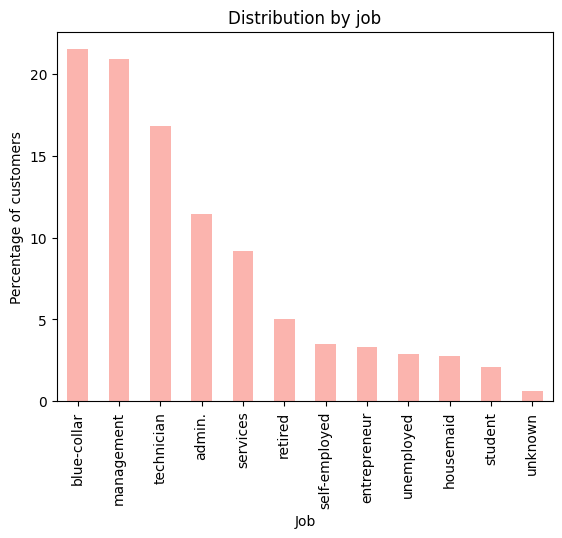

In [84]:
(df['job'].value_counts(normalize=True)*100).plot(kind='bar', cmap="Pastel1" )
plt.title("Distribution by job")
plt.xlabel("Job")
plt.ylabel("Percentage of customers")

In [9]:
(df[df["y"] == "yes"].groupby("job").size() / 
 df.groupby("job").size() * 100).sort_values()

job
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
services          8.883004
technician       11.056996
unknown          11.805556
self-employed    11.842939
admin.           12.202669
management       13.755551
unemployed       15.502686
retired          22.791519
student          28.678038
dtype: float64

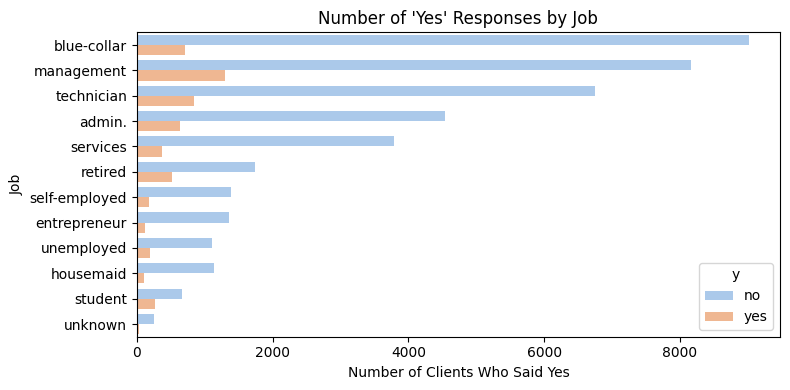

In [10]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="job", hue="y", order=df["job"].value_counts().index, palette="pastel")
plt.title("Number of 'Yes' Responses by Job")
plt.xlabel("Number of Clients Who Said Yes")
plt.ylabel("Job")
plt.tight_layout()
plt.show()

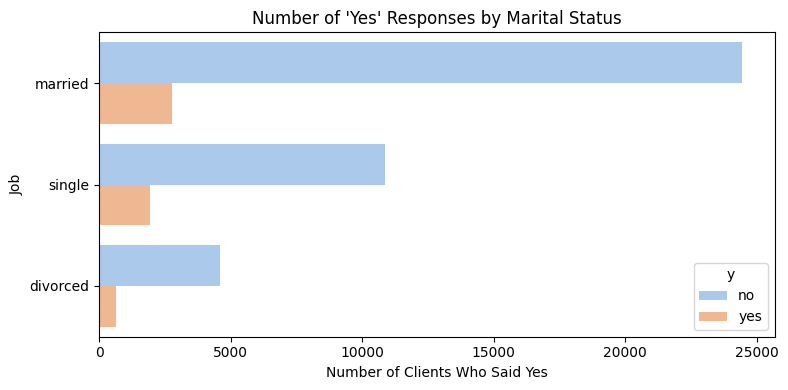

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="marital", hue="y", order=df["marital"].value_counts().index, palette="pastel")
plt.title("Number of 'Yes' Responses by Marital Status")
plt.xlabel("Number of Clients Who Said Yes")
plt.ylabel("Job")
plt.tight_layout()
plt.show()

In [12]:
(df[df["y"] == "yes"].groupby("marital").size() / 
 df.groupby("marital").size() * 100).sort_values()

marital
married     10.123466
divorced    11.945458
single      14.949179
dtype: float64

/tmp/ipykernel_23833/482871330.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prev_success = df[df['y'] == 'yes'].groupby('previous_bins').size()
/tmp/ipykernel_23833/482871330.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = df.groupby('previous_bins').size()
/tmp/ipykernel_23833/482871330.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yes = df[df['y'] == 'yes'].groupby('previous_bins').size()


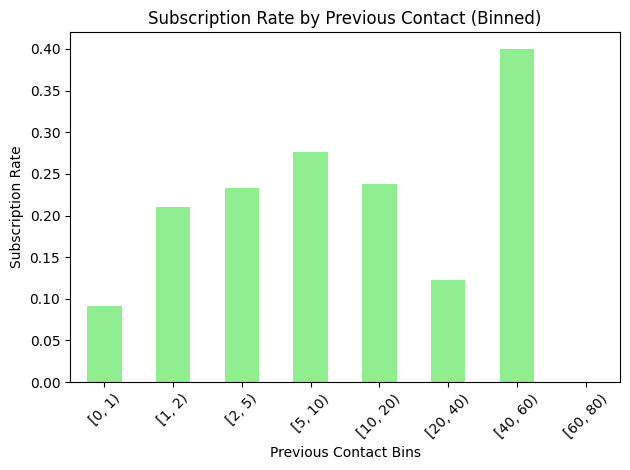

In [91]:
df['previous_bins'] = pd.cut(df['previous'], bins=[0, 1, 2, 5, 10, 20, 40, 60, 80], right=False)

prev_success = df[df['y'] == 'yes'].groupby('previous_bins').size()

total = df.groupby('previous_bins').size()
yes = df[df['y'] == 'yes'].groupby('previous_bins').size()

rate = (yes / total).fillna(0)

rate.plot(kind='bar', color='lightgreen')
plt.title("Subscription Rate by Previous Contact (Binned)")
plt.ylabel("Subscription Rate")
plt.xlabel("Previous Contact Bins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

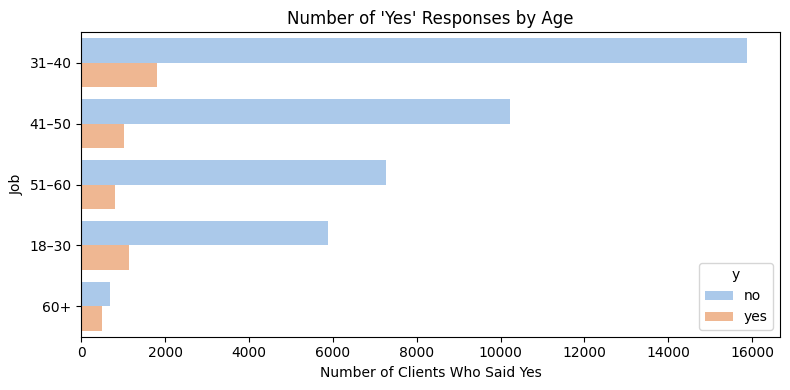

In [94]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="age_group", hue="y", order=df["age_group"].value_counts().index, palette="pastel")
plt.title("Number of 'Yes' Responses by Age")
plt.xlabel("Number of Clients Who Said Yes")
plt.ylabel("Job")
plt.tight_layout()
plt.show()

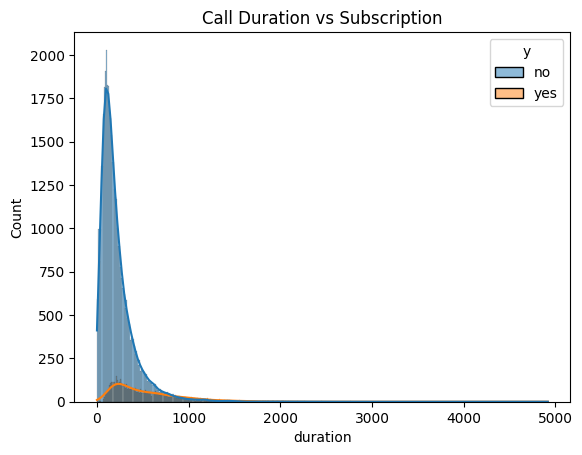

In [95]:
sns.histplot(data=df, x="duration", hue="y", kde=True)
plt.title("Call Duration vs Subscription")
plt.show()

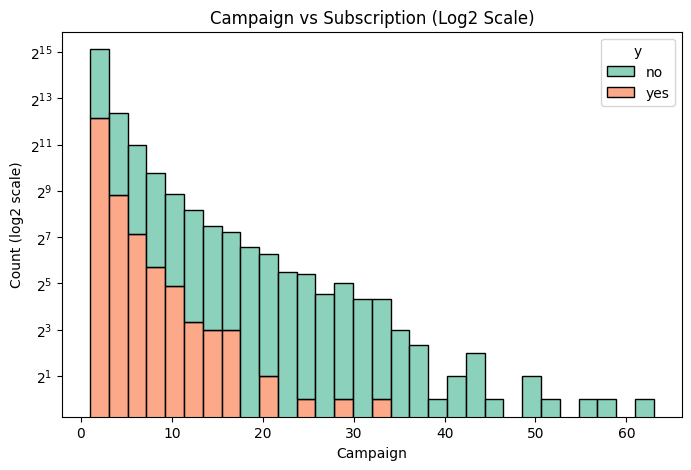

In [96]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['campaign'] > 0], x='campaign', hue='y', bins=30, multiple='stack', palette='Set2')

plt.yscale('log', base=2)
plt.title("Campaign vs Subscription (Log2 Scale)")
plt.xlabel("Campaign")
plt.ylabel("Count (log2 scale)")
plt.show()

How can we improve the success of our campaign?

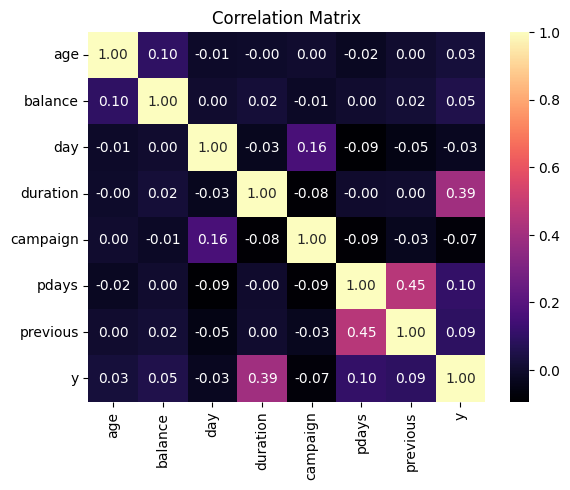

In [97]:
# Correlation Heatmap
df_encoded = df.copy()
df_encoded["y"] = df_encoded["y"].map({"yes": 1, "no": 0})
corr = df_encoded.select_dtypes(include='number').corr()

sns.heatmap(corr, annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 💡 Key Insights

- Job categories such as student and retired show higher subscription rates, suggesting they are more receptive to the campaign, 28% and 22% respectiv.
- Longer call durations are strongly associated with positive campaign outcomes, indicating that engaged conversations matter.
- Previous successful contacts significantly increase the likelihood of subscription, highlighting the importance of relationship history. (40-60 previous contacts)
- The first contact in a campaign tends to have a higher conversion rate compared to repeated attempts.
- Individuals who are single or divorced appear more likely to subscribe than those who are married — this may reflect different financial needs or risk profiles.
- The correlation heatmap shows that no single numeric feature has a strong linear correlation with others. It means relationships may be non-linear

### Random Forest Modeling and A/B Test on Marketing Campaign

This notebook helps answer both questions:
- **What features are most important to predict subscriptions?** → via Random Forest model.
- **Is call duration impacting conversion?** → via A/B test.

#### Random Forest Modeling

In [ ]:
df = df.drop(['age_group', 'previous_bins'], axis=1)

X = df.drop(["y"], axis=1)
y = df["y"].map({"yes": 1, "no": 0})

# Separate types
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessing
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("scale", StandardScaler(), numerical_cols)
])

In [ ]:
# Pipeline with RandomForest

rf = RandomForestClassifier(random_state=42)

pipeline = ImbPipeline([
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", rf)  
    ])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
param_dist = {
    "model__n_estimators": randint(100, 500),            # number of trees
    "model__max_depth": randint(5, 20),                  # depth of trees
    "model__min_samples_split": randint(2, 10),          # split threshold
    "model__min_samples_leaf": randint(1, 10),           # leaf threshold
    "model__max_features": ["sqrt", "log2"]              # feature selection method
}

In [ ]:
search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring="f1",   # or "f1" if you want balance
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('onehot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                                                              ('scale',
                                                                               StandardScaler(),
                                                                               Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']...
                                        'model__max_features': ['sqrt', 'log2'],
                                        'model__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7783de0fed40>,
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7783de0b7df0>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7783dea46710>},
                   random_state=42, scoring='f1', verbose=1)

In [ ]:
# Evaluation

y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7952
           1       0.43      0.82      0.56      1091

    accuracy                           0.85      9043
   macro avg       0.70      0.83      0.73      9043
weighted avg       0.91      0.85      0.86      9043



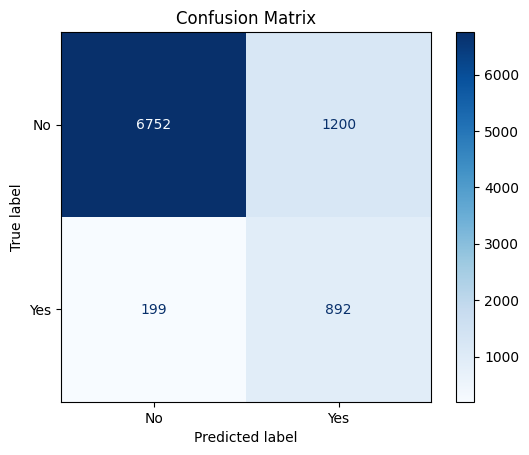

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(pipeline.named_steps)

{'preprocess': ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'))]), 'smote': SMOTE(random_state=42), 'model': RandomForestClassifier(random_state=42)}


In [ ]:
# Feature Importance
# Get feature names

preprocessor = pipeline.named_steps["preprocess"]
onehot_cols = preprocessor.named_transformers_["onehot"].get_feature_names_out(categorical_cols)

all_features = np.concatenate([onehot_cols, numerical_cols])

/tmp/ipykernel_23833/392029763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(8), x="importance", y="feature", palette="viridis")


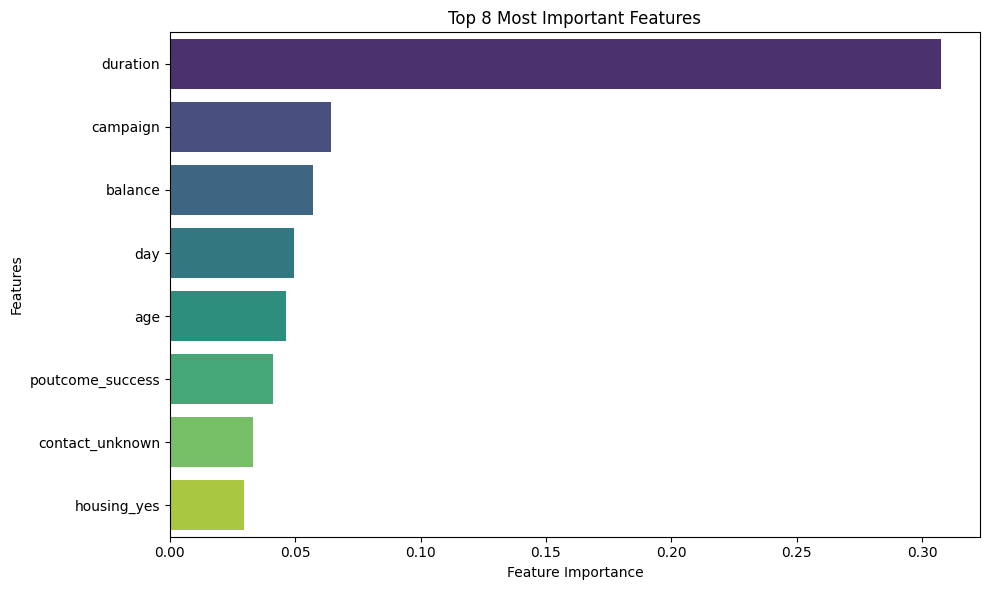

In [104]:
# Extract feature importances

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(8), x="importance", y="feature", palette="viridis")
plt.title("Top 8 Most Important Features")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

#### A/B Test: Impact of Call Duration

In [ ]:
# Group A: random sample
group_A = df.sample(n=1000, random_state=42)
subs_A = group_A[group_A['y'] == 'yes'].shape[0]
total_A = group_A.shape[0]

# Group B: calls > 180 seconds
group_B = df[df['duration'] > 180].sample(n=1000, random_state=42)
subs_B = group_B[group_B['y'] == 'yes'].shape[0]
total_B = group_B.shape[0]   

counts = [subs_A, subs_B]
nobs = [total_A, total_B]

# ⚖️ Run 1-sided z-test: H1 = subscription rate in B is higher
stat, pval = proportions_ztest(count=counts, nobs=nobs, alternative='smaller')

print("Z-statistic:", stat)
print("P-value:", pval)

# Results
alpha = 0.05
if pval < alpha:
    print("✅ Statistically significant difference. Reject H₀.")
else:
    print("❌ No significant difference. Fail to reject H₀.")


Z-statistic: -4.74189761292837
P-value: 1.058628134735872e-06
✅ Statistically significant difference. Reject H₀.


In [ ]:
# Conversion rates
conv_rate_A = subs_A / total_A
conv_rate_B = subs_B / total_B
absolute_increase = conv_rate_B - conv_rate_A


In [72]:
relative_increase = (absolute_increase / conv_rate_A) * 100
relative_increase

62.20472440944881

### A/B Test Summary

We compared two groups of 1,000 clients each:
- **Group A (Standard Calls)**: Shorter call durations
- **Group B (Test - Long Calls >180s)**: Longer call durations

**Conversion Rates**:
- Group A: 12.7,%
- Group B: 20.6%

*Result*: A statistically significant difference (p-value < 0.001).  
✅ Clients who received longer calls were **62.2% more likely** to subscribe to the campaign.